<a href="https://colab.research.google.com/github/namhawon/2025_Study02/blob/main/09_250516_AI%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EA%B8%B0%EC%B4%88_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9주차 강의노트**

# Pandas란?

Pandas(판다스)는 Python에서 데이터를 다루기 위한 라이브러리로, 데이터 분석, 전처리, 시각화 준비 등에 널리 사용된다. 특히, 엑셀과 유사한 DataFrame 구조를 제공하여 데이터를 직관적으로 조작할 수 있다.



# Pandas 설치 방법

In [1]:
pip install pandas

In [2]:
import pandas as pd

print(pd.__version__)

2.2.2


# 주요 기능 및 기본 문법

## 1. Series와 DataFrame

In [3]:
import pandas as pd

s = pd.Series([10, 20, 30, 40])
print(s)

0    10
1    20
2    30
3    40
dtype: int64


In [4]:
data = {
    '이름': ['홍길동', '김철수', '이영희'],
    '나이': [25, 30, 27],
    '성별': ['남', '남', '여']
}

df = pd.DataFrame(data)
print(df)

    이름  나이 성별
0  홍길동  25  남
1  김철수  30  남
2  이영희  27  여


## 2. CSV 파일 불러오기 및 저장

In [ ]:
df = pd.read_csv('students.csv')
print(df.head())  # 처음 5행만 출력

In [ ]:
df.to_csv('output_students.csv', index=False)

## 3. 데이터 탐색

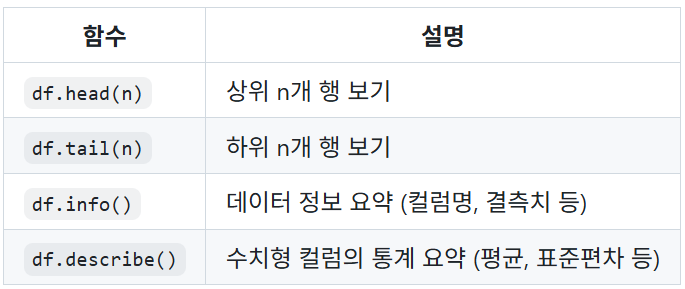

## 4. 특정 열/행 선택

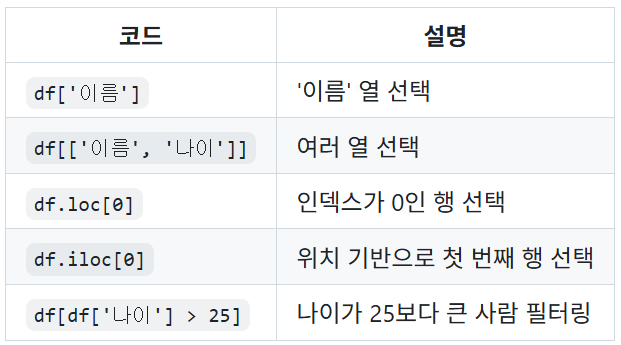

## 5. 데이터 수정

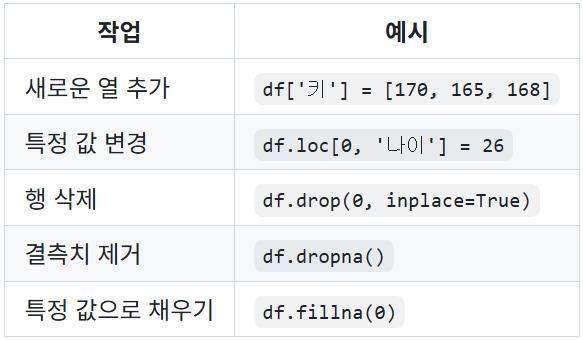

## 6. 그룹화 및 집계 (Grouping and Aggregation)

Pandas에서 **groupby()**는 데이터를 특정 기준(예: 성별, 부서, 지역 등)으로 그룹화하여 각 그룹별로 계산이나 분석을 수행하는 데 사용됩니다.
이는 엑셀의 피벗 테이블(Pivot Table) 과 유사한 개념이며, 데이터를 범주별로 나누고, 각 범주 내에서 집계 통계량(평균, 합계 등)을 계산할 때 주로 활용됩니다.

In [ ]:
df.groupby('그룹화할 열')[대상 열].집계함수()

In [6]:
import pandas as pd

data = {
    '성별': ['남', '여', '남', '여', '남'],
    '부서': ['영업', '인사', '영업', '재무', '영업'],
    '연봉': [5000, 4500, 5200, 4800, 5100]
}

df = pd.DataFrame(data)
print(df)

  성별  부서    연봉
0  남  영업  5000
1  여  인사  4500
2  남  영업  5200
3  여  재무  4800
4  남  영업  5100


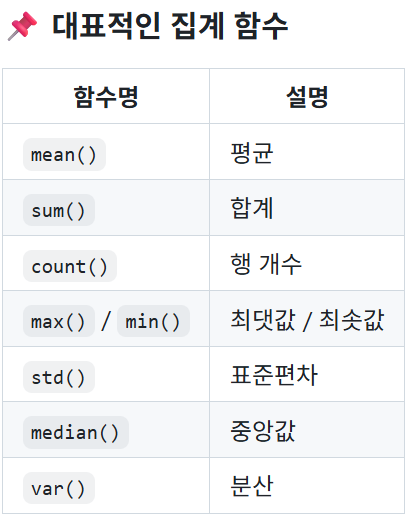

# **9주차 강의노트 예제 문제**

## 예제 1: 성별로 연봉 평균 구하기

In [7]:
result = df.groupby('성별')['연봉'].mean()
print(result)

성별
남    5100.0
여    4650.0
Name: 연봉, dtype: float64


해설: 남자의 평균 연봉은 5100만 원, 여자는 4650만 원입니다.

## 예제 2: 부서별 연봉 총합 구하기

In [8]:
result = df.groupby('부서')['연봉'].sum()
print(result)

부서
영업    15300
인사     4500
재무     4800
Name: 연봉, dtype: int64


해설: 영업 부서의 총 연봉은 15300만 원입니다.

## 예제 3: 성별 + 부서 조건으로 그룹화

In [9]:
result = df.groupby(['성별', '부서'])['연봉'].mean()
print(result)

성별  부서
남   영업    5100.0
여   인사    4500.0
    재무    4800.0
Name: 연봉, dtype: float64


해설: 복합 조건으로 그룹화하여 더 세분화된 평균을 볼 수 있습니다.

## **여러 집계 함수 한 번에 적용: agg()**

하나의 그룹에 대해 여러 집계 함수를 동시에 적용하고 싶을 때는 agg() 함수를 사용한다

## 예제 1: 부서별 연봉의 평균과 합계를 동시에 구하기

In [26]:
result = df.groupby('부서')['연봉'].agg(['mean', 'sum'])
print(result)

      mean    sum
부서               
영업  5100.0  15300
인사  4500.0   4500
재무  4800.0   4800


해설: 각 부서별로 평균과 합계를 함께 확인할 수 있습니다.

## 예제 2: 커스텀 집계 함수 적용

In [27]:
import numpy as np

result = df.groupby('부서')['연봉'].agg(
    평균='mean',
    최대='max',
    사분위수=lambda x: np.percentile(x, 75)
)
print(result)

        평균    최대    사분위수
부서                      
영업  5100.0  5200  5150.0
인사  4500.0  4500  4500.0
재무  4800.0  4800  4800.0


## **멀티컬럼 집계**

In [28]:
result = df.groupby('부서').agg(
    평균_연봉=('연봉', 'mean'),
    인원수=('성별', 'count')
)
print(result)

     평균_연봉  인원수
부서             
영업  5100.0    3
인사  4500.0    1
재무  4800.0    1


## **필터링과 결합 (filter)**

In [29]:
filtered = df.groupby('부서').filter(lambda x: len(x) >= 2)
print(filtered)

  성별  부서    연봉
0  남  영업  5000
2  남  영업  5200
4  남  영업  5100


## **시각화와 연결 (예: matplotlib)**

In [ ]:
import matplotlib.pyplot as plt

result = df.groupby('부서')['연봉'].mean()

result.plot(kind='bar', title='부서별 평균 연봉')
plt.xlabel('부서')
plt.ylabel('평균 연봉 (만 원)')
plt.show()

# **9주차 강의노트 실습문제**

## 문제 1: 다음 데이터를 DataFrame으로 만들고 출력하세요.

In [31]:
data = {
    '상품': ['노트북', '스마트폰', '태블릿'],
    '가격': [1200000, 800000, 500000],
    '재고': [5, 10, 8]
}

In [32]:
import pandas as pd

data = {
    '상품': ['노트북', '스마트폰', '태블릿'],
    '가격': [1200000, 800000, 500000],
    '재고': [5, 10, 8]
}

df = pd.DataFrame(data)
print(df)

     상품       가격  재고
0   노트북  1200000   5
1  스마트폰   800000  10
2   태블릿   500000   8


## 문제 2: 위 데이터에서 재고가 7 이상인 상품만 필터링하세요.

In [33]:
filtered_df = df[df['재고'] >= 7]
print(filtered_df)

     상품      가격  재고
1  스마트폰  800000  10
2   태블릿  500000   8


## 문제 3: 가격 열을 기준으로 내림차순 정렬하세요.

In [34]:
sorted_df = df.sort_values(by='가격', ascending=False)
print(sorted_df)

     상품       가격  재고
0   노트북  1200000   5
1  스마트폰   800000  10
2   태블릿   500000   8


# **참고 자료 및 추천 학습 플랫폼**

- 공식 문서: https://pandas.pydata.org
- Google Colab: https://colab.research.google.com
- YouTube 튜토리얼: Pandas Tutorial for Beginners
- 책 추천: 『Do it! 데이터 분석을 위한 판다스 입문』

# **요약**
- Pandas는 Python에서 데이터를 다루는 데 가장 많이 사용되는 라이브러리이다.
- Series와 DataFrame은 Pandas의 핵심 데이터 구조이다.
- CSV 파일을 불러오고 저장하는 기능을 통해 실제 데이터를 다룰 수 있다.
- 데이터 선택, 필터링, 수정, 그룹화 등의 다양한 기능을 사용할 수 있다.